cumulative netTOA radiative flux vs thermal OHC anomaly

In [9]:
import numpy
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
import matplotlib.pyplot as plt

In [2]:
y_data = numpy.array([ 8.98702316e+21,  9.08387519e+21,  1.05062075e+22,
                    9.75610111e+21,  9.49869894e+21,  7.40206565e+21,
                    2.79996042e+21,  2.35518558e+21, -9.28130821e+20,
                   -4.71798477e+21, -1.35215844e+21, -1.99075328e+21,
                   -2.13636630e+21,  2.09867078e+20,  1.71659860e+21,
                   -1.44722812e+21, -3.61822747e+21, -1.46497885e+21,
                    1.68116780e+21,  1.15630823e+21, -3.74413005e+20,
                    2.75239196e+21,  2.54143192e+21,  3.65668516e+21,
                    7.09759604e+21,  4.20260628e+21,  2.46735950e+21,
                    3.72415520e+21,  2.30967507e+21, -1.60948051e+21,
                   -4.36874951e+21, -9.63262216e+21, -1.22374165e+22,
                   -1.18499619e+22, -1.38004366e+22, -1.19257467e+22,
                   -1.35549006e+22, -1.38573566e+22, -1.51650507e+22,
                   -1.34802850e+22, -9.80244339e+21, -1.39590705e+22,
                   -1.76216698e+22, -1.37943059e+22, -1.21379533e+22,
                   -9.65433290e+21, -7.84253653e+21, -5.53653851e+21,
                   -6.90053496e+21, -5.10515605e+21, -7.14627669e+21,
                   -8.19335070e+21, -8.07977315e+21, -9.13748219e+21,
                   -7.03564201e+21, -6.60472026e+21, -4.67987662e+21,
                   -7.61361392e+20, -5.00985955e+21, -4.09981102e+21,
                   -3.36138935e+21, -3.29426117e+21,  5.98974942e+20,
                    6.31951212e+21,  7.20462475e+21,  7.25201284e+21,
                    1.02927973e+22,  8.66483160e+21,  1.36948568e+22,
                    1.62215952e+22,  1.29137058e+22,  1.47647894e+22,
                    1.74440752e+22,  1.71205119e+22,  1.54598266e+22,
                    1.61265701e+22,  1.59559715e+22,  1.42817851e+22,
                    1.85996567e+22,  1.94151864e+22,  2.05594861e+22,
                    1.67023823e+22,  1.78380638e+22,  1.93026285e+22,
                    1.79312968e+22,  2.12197054e+22,  2.23385676e+22,
                    2.11213481e+22,  1.57358191e+22,  1.58430111e+22,
                    1.81115924e+22,  1.35468644e+22,  1.68069436e+22,
                    1.78977109e+22,  1.49869565e+22,  1.44043082e+22,
                    1.54835564e+22,  2.00569982e+22,  2.36272658e+22,
                    1.66999953e+22,  1.62652493e+22,  1.98245374e+22,
                    1.62177404e+22,  1.49393637e+22,  1.64891436e+22,
                    1.98676760e+22,  1.42480179e+22,  1.26226026e+22,
                    1.43251843e+22,  1.26930284e+22,  1.63877628e+22,
                    1.40827249e+22,  1.29404203e+22,  1.04623589e+22,
                    9.14710043e+21,  7.66211852e+21,  8.00628960e+21,
                    3.85003734e+21,  6.18691737e+21,  6.02226720e+21,
                    5.18836610e+21,  2.07418513e+19,  3.01209035e+21,
                    8.16597552e+21,  5.65485717e+21,  1.30867979e+21,
                   -8.70362597e+21, -6.55908385e+21, -6.24951446e+21,
                   -9.60712750e+21, -9.46939938e+21, -9.16769805e+21,
                   -8.53540958e+21, -1.29027075e+22, -1.34414030e+22,
                   -1.18171445e+22, -9.02931809e+21, -8.40927375e+21,
                   -1.01235378e+22, -1.00078491e+22, -8.39531315e+21,
                   -9.28356043e+21, -1.15065562e+22, -1.35651615e+22,
                   -1.39602193e+22, -1.73556227e+22, -2.15859160e+22,
                   -2.06546117e+22, -2.08912862e+22, -2.12965018e+22,
                   -2.58678711e+22, -2.46112050e+22, -2.25235370e+22,
                   -2.71004794e+22, -2.65155627e+22, -2.95969244e+22,
                   -2.86823394e+22, -3.25999452e+22, -3.38540779e+22,
                   -3.74418068e+22, -3.35355041e+22, -3.49609545e+22,
                   -3.52219330e+22, -3.23195811e+22, -3.57482987e+22,
                   -3.60135985e+22, -3.37817261e+22, -3.33834523e+22,
                   -3.78170048e+22, -4.10858240e+22, -4.06913499e+22,
                   -4.16306340e+22, -4.37370623e+22, -3.83490070e+22,
                   -3.76259722e+22, -4.00688189e+22, -4.06804262e+22,
                   -4.11264429e+22, -4.39053951e+22, -4.51861439e+22,
                   -4.13041296e+22, -4.10874896e+22, -3.85396822e+22,
                   -3.83246366e+22, -3.46123720e+22, -3.20668177e+22,
                   -3.35195860e+22, -3.58058367e+22, -2.87648377e+22,
                   -2.63883377e+22, -2.85097407e+22, -2.89659258e+22,
                   -2.79234917e+22, -2.52158062e+22, -2.46738847e+22,
                   -2.32994841e+22, -1.87606056e+22, -2.05516673e+22,
                   -1.70127428e+22, -1.91374083e+22, -1.75977375e+22,
                   -1.18940121e+22, -8.52236983e+21, -7.48273970e+21,
                   -6.11007290e+21, -1.07285988e+21,  1.79897036e+21,
                    3.50485541e+21,  5.87711053e+21,  1.00817705e+22,
                    1.21211507e+22,  1.48270413e+22,  1.47014412e+22,
                    1.15778961e+22,  1.16194548e+22,  1.26607491e+22,
                    1.22032890e+22,  1.55773535e+22,  1.74526969e+22,
                    1.93285485e+22,  1.75403458e+22,  2.17491735e+22,
                    1.81298443e+22,  2.10073344e+22,  2.28860676e+22,
                    2.69308482e+22,  2.61458554e+22,  2.83598211e+22,
                    3.22403272e+22,  3.49556171e+22,  3.51732364e+22,
                    2.82292923e+22,  3.17800917e+22,  3.71641304e+22,
                    3.43873071e+22,  3.67751234e+22,  3.91640028e+22,
                    3.85557357e+22,  4.29456513e+22,  4.70036482e+22,
                    4.39003224e+22,  4.66281975e+22,  4.95239054e+22,
                    4.90895171e+22,  4.71573480e+22,  4.82247994e+22,
                    5.07928199e+22,  5.45282139e+22,  5.57665994e+22,
                    5.51742195e+22,  5.14185841e+22,  4.91636195e+22,
                    4.19132244e+22,  4.31595335e+22,  4.49072151e+22,
                    4.09932898e+22,  3.57485261e+22,  3.63355194e+22,
                    3.67577437e+22,  3.53495865e+22,  3.41098881e+22,
                    3.73695247e+22,  3.31354815e+22,  2.80705987e+22,
                    2.90042414e+22,  2.64419918e+22,  2.40484097e+22,
                    2.06576019e+22,  2.30988616e+22,  2.45428931e+22,
                    2.41569616e+22,  2.42729936e+22,  1.53965712e+22,
                    1.56838650e+22,  1.26421046e+22,  8.76995778e+21,
                    5.56650949e+21,  1.03302495e+21, -2.49853322e+21,
                   -4.69497197e+21, -4.39029258e+21, -4.08298531e+21,
                   -6.77125981e+21, -4.62631194e+21, -8.14199848e+21,
                   -1.04889541e+22, -9.83482755e+21, -7.17905886e+21,
                   -4.18726059e+21, -2.02543396e+21, -5.19083879e+21,
                   -3.18965685e+21, -1.86025703e+20, -3.17587429e+21,
                   -1.83180142e+21, -1.15089439e+21, -2.46571555e+21,
                    5.37696500e+19, -5.88331694e+20, -2.22658206e+21,
                    1.30206730e+21,  4.33435659e+21, -5.78897370e+21,
                   -7.08073896e+21, -6.53683210e+21, -8.98770725e+21,
                   -1.26010492e+22, -9.04837028e+21, -4.99244129e+21,
                   -9.09480241e+21, -5.19819677e+21, -2.13079778e+21,
                   -7.38810970e+21, -1.01431560e+22, -1.07290242e+22,
                   -1.34765210e+22, -1.22224537e+22, -1.69610315e+22,
                   -1.60323283e+22, -1.44334314e+22, -1.36633561e+22,
                   -9.55789539e+21, -8.61322270e+21, -7.66438965e+21,
                   -5.04582222e+21, -2.25649979e+21, -4.79315702e+21,
                   -3.66109790e+21, -2.19165436e+21, -1.55075554e+21,
                   -2.40461120e+21, -3.42069753e+21, -3.59954093e+21,
                   -5.43963165e+21, -6.10921557e+21, -3.10987704e+21,
                   -4.93645103e+21, -6.09213333e+21, -3.24559454e+21,
                   -3.05953326e+21, -7.03317734e+20, -2.83986273e+21,
                   -3.13930619e+21, -4.10028247e+21, -6.72212358e+21,
                   -7.34030578e+21, -8.95296670e+21, -1.12270213e+22,
                   -1.44955572e+22, -1.27619786e+22, -1.23559339e+22,
                   -1.06122663e+22, -8.19725736e+21, -9.27500879e+21,
                   -1.11805077e+22, -8.25028066e+21, -1.08115873e+22,
                   -1.05359040e+22, -1.44191958e+22, -1.41329392e+22,
                   -1.60067105e+22, -1.38773167e+22, -1.24088672e+22,
                   -1.21009025e+22, -1.42858767e+22, -1.06354825e+22,
                   -1.41419577e+22, -1.34785341e+22, -1.01444074e+22,
                   -7.97055678e+21, -6.79035033e+21, -7.76986134e+21,
                   -8.74350816e+21, -1.07107669e+22, -7.84171107e+21,
                   -1.21292116e+22, -1.29128170e+22, -1.06922120e+22,
                   -1.17969730e+22, -9.39773452e+21, -9.99067019e+21,
                   -1.24097813e+22, -7.16058028e+21, -3.23776576e+21,
                   -5.63835294e+21, -2.53592651e+21,  7.39376019e+20,
                   -1.30925208e+21, -2.18556775e+21, -1.72286702e+21,
                   -3.75234533e+21, -2.44400415e+21, -5.12678659e+21,
                   -7.96964384e+21, -8.30741895e+21, -7.97228559e+21,
                   -5.63171997e+21, -7.44870127e+21, -4.42853349e+21,
                   -2.06780718e+21, -5.53035094e+21, -6.65409426e+21,
                   -9.10349130e+21, -6.38244315e+21, -3.32129584e+21,
                   -9.19525489e+20, -3.00818343e+21,  1.07325381e+21,
                    1.99696545e+21, -3.40192738e+21, -2.96374299e+21,
                    6.46359188e+20, -1.39965017e+21, -5.27072223e+21,
                   -2.63840552e+21, -3.82981552e+21, -4.01453664e+21,
                   -2.52614548e+21, -4.86152083e+21, -6.19003093e+21,
                   -7.51107984e+21, -4.82694952e+21, -7.63212997e+21,
                   -8.59746441e+21, -1.00548459e+22, -5.34157842e+21,
                    4.56034208e+19,  1.10975640e+21,  1.68192933e+21,
                   -4.40092902e+21, -3.15281249e+20,  1.13793325e+20,
                    2.04976048e+21,  4.16023803e+21,  7.77782182e+21,
                    3.90774128e+21,  3.04399478e+21,  2.35482569e+21,
                    2.33998821e+21,  5.66463927e+21,  7.49836078e+21,
                    4.67634592e+21,  6.02676560e+21,  5.71976289e+21,
                    6.58709188e+21,  4.46443488e+21, -3.14906972e+20,
                    5.77445760e+20,  3.14391664e+21,  4.71949034e+21,
                    5.30412956e+21,  4.39822171e+21,  2.33485178e+21,
                    4.11124868e+21,  6.22933921e+21,  4.35849676e+21,
                    5.66120889e+21,  3.80782718e+21,  3.79543644e+21,
                    2.93971218e+20,  3.46416350e+21,  2.47896221e+21,
                    2.16892706e+21,  2.70076202e+21,  2.57527157e+21,
                   -5.39437374e+20,  1.68508667e+21,  2.25309491e+21,
                   -1.83376643e+21, -7.47743506e+20,  3.17905443e+21,
                    3.45067004e+21, -1.09904200e+21,  2.68903884e+21,
                    8.65186132e+21,  1.79823807e+21,  2.84267583e+20,
                    3.27707091e+21,  3.11451062e+21,  3.46125455e+21,
                    1.15235175e+21, -3.64549377e+21, -3.43660015e+21,
                   -3.86407428e+20,  2.84006905e+21, -8.68191090e+19,
                   -1.33826778e+21, -2.08020613e+21, -3.31203819e+21,
                   -3.70116813e+21, -9.15561244e+20,  8.80608875e+20,
                   -1.14441439e+21, -1.82687702e+21,  2.83086696e+21,
                    8.33159377e+21,  1.33427050e+22,  1.51991133e+22,
                    1.82316590e+22,  2.19407294e+22])

In [3]:
x_data = numpy.array([ 7.18168242e+21,  7.04896364e+21,  7.46852721e+21,
                    5.11635652e+21,  7.26956245e+21,  3.41701975e+21,
                   -2.70993224e+21,  1.04495099e+21, -1.29751237e+21,
                   -4.90457287e+21, -2.54852701e+21, -1.50468559e+21,
                   -3.31290586e+21,  7.16524441e+20,  3.53364752e+21,
                    1.19800713e+21, -2.96640316e+21, -1.50730654e+21,
                    2.13351057e+21,  2.36527075e+21, -1.63340560e+20,
                    5.35766199e+21,  3.19292182e+21,  4.05911787e+21,
                    8.22818320e+21,  4.95886965e+21,  3.42642700e+21,
                    6.35518890e+21,  4.76412785e+21, -1.06011924e+21,
                   -6.11750709e+20, -6.93831168e+21, -7.23087523e+21,
                   -8.70556961e+21, -1.08882129e+22, -6.12719139e+21,
                   -1.25267859e+22, -1.19687465e+22, -1.28141105e+22,
                   -9.07575483e+21, -6.48855264e+21, -1.07616590e+22,
                   -1.41606492e+22, -9.80986775e+21, -9.66319805e+21,
                   -9.25738752e+21, -8.69174526e+21, -5.06960340e+21,
                   -7.41508472e+21, -6.94501912e+21, -8.50468653e+21,
                   -6.48279338e+21, -8.17538110e+21, -6.56739286e+21,
                   -4.56350530e+21, -5.77386434e+21, -1.38705995e+21,
                    3.02252167e+21, -4.42896265e+21, -3.09873971e+21,
                   -1.98710734e+20, -2.91100700e+21,  3.43116975e+21,
                    8.70125464e+21,  9.34028479e+21,  8.72956937e+21,
                    1.10759229e+22,  7.48227283e+21,  1.23002103e+22,
                    1.63826876e+22,  1.01480151e+22,  1.21502992e+22,
                    1.75858464e+22,  1.37358957e+22,  1.30003484e+22,
                    1.42143017e+22,  1.28069391e+22,  1.34836908e+22,
                    1.73189433e+22,  1.53640872e+22,  1.65887969e+22,
                    1.34846515e+22,  1.49248976e+22,  1.51245206e+22,
                    1.52654610e+22,  1.73893307e+22,  1.68600705e+22,
                    1.59511275e+22,  8.96210709e+21,  1.13218418e+22,
                    1.10605124e+22,  8.63814130e+21,  9.96758561e+21,
                    1.31680739e+22,  8.99380020e+21,  7.19830663e+21,
                    1.10751151e+22,  1.57009289e+22,  1.63059949e+22,
                    8.31887367e+21,  1.23147553e+22,  1.53811909e+22,
                    9.08571206e+21,  8.65323776e+21,  9.37254554e+21,
                    1.44209628e+22,  6.76422752e+21,  5.46055626e+21,
                    1.09873764e+22,  1.00265780e+22,  9.57374547e+21,
                    7.50153181e+21,  8.95979766e+21,  5.64369912e+21,
                    5.00127482e+21,  4.25991957e+21,  5.31045445e+21,
                   -8.56013231e+20,  2.23354070e+21,  3.43917454e+21,
                    2.73441173e+21, -1.62431222e+21,  3.04925628e+21,
                    8.90875573e+21,  2.59063527e+21,  9.09747148e+20,
                   -8.06648233e+21, -4.17292298e+21, -6.59853727e+21,
                   -7.47441620e+21, -7.11000660e+21, -6.23901587e+21,
                   -3.89823939e+21, -9.00649818e+21, -6.93140176e+21,
                   -7.41592275e+21, -4.46019169e+21, -3.78419932e+21,
                   -4.40366117e+21, -6.30045937e+21, -4.23269710e+21,
                   -5.33022345e+21, -6.22318167e+21, -6.99062480e+21,
                   -9.57922597e+21, -1.18667829e+22, -1.58272834e+22,
                   -1.53154462e+22, -1.37332674e+22, -1.53632483e+22,
                   -2.10277018e+22, -1.75998673e+22, -1.67793268e+22,
                   -2.58554847e+22, -2.07436662e+22, -2.38659042e+22,
                   -2.27810114e+22, -2.76334604e+22, -2.71782903e+22,
                   -3.00662553e+22, -2.42895621e+22, -2.62414887e+22,
                   -2.64196699e+22, -2.21491005e+22, -2.93883003e+22,
                   -2.58238476e+22, -2.47509320e+22, -2.62336465e+22,
                   -2.95013753e+22, -3.28973088e+22, -3.30382572e+22,
                   -3.40283083e+22, -3.66209311e+22, -3.02563094e+22,
                   -3.04053521e+22, -3.45006077e+22, -3.58231235e+22,
                   -3.32884851e+22, -3.85084939e+22, -3.73928487e+22,
                   -3.40858017e+22, -3.49401478e+22, -3.06074310e+22,
                   -3.30479175e+22, -2.70022842e+22, -2.70767331e+22,
                   -2.76021870e+22, -3.15042806e+22, -2.45437205e+22,
                   -2.29190133e+22, -2.53893746e+22, -2.68148582e+22,
                   -2.43423295e+22, -2.27945844e+22, -2.50191370e+22,
                   -2.06124829e+22, -1.62954882e+22, -1.98023624e+22,
                   -1.47225671e+22, -1.98739862e+22, -1.57619737e+22,
                   -1.31187031e+22, -8.51065152e+21, -8.76643419e+21,
                   -9.43099399e+21, -2.74879031e+21,  2.73937520e+20,
                   -9.89098385e+20,  5.00532352e+20,  7.90674793e+21,
                    8.21155757e+21,  1.29183538e+22,  1.04901133e+22,
                    6.87674501e+21,  1.05497248e+22,  9.97049869e+21,
                    7.80004095e+21,  1.29524980e+22,  1.53810100e+22,
                    1.27419384e+22,  1.49010301e+22,  1.72095375e+22,
                    1.13650279e+22,  1.59098864e+22,  1.60329542e+22,
                    2.13329221e+22,  1.73162349e+22,  2.04696473e+22,
                    2.35616814e+22,  2.79132405e+22,  2.73579696e+22,
                    1.90308140e+22,  2.50382997e+22,  2.98856980e+22,
                    2.55864557e+22,  2.89595039e+22,  3.23791175e+22,
                    2.97854717e+22,  3.52957102e+22,  3.99828071e+22,
                    3.36484889e+22,  3.77496163e+22,  4.13032073e+22,
                    3.89941800e+22,  3.93553022e+22,  3.90057370e+22,
                    4.23549785e+22,  4.54844416e+22,  4.58721669e+22,
                    4.61454351e+22,  4.40657617e+22,  4.12720774e+22,
                    3.29723326e+22,  3.68192491e+22,  3.63467968e+22,
                    3.56356281e+22,  2.96268470e+22,  3.14215095e+22,
                    3.16253012e+22,  2.97461992e+22,  2.86432904e+22,
                    3.09949187e+22,  3.04139540e+22,  2.70705491e+22,
                    2.52342011e+22,  2.64129998e+22,  2.27644485e+22,
                    1.92831507e+22,  2.45514797e+22,  2.39694636e+22,
                    2.62992778e+22,  2.63732820e+22,  1.45691475e+22,
                    1.75678905e+22,  1.12542498e+22,  1.08628253e+22,
                    7.83921505e+21,  4.00005505e+21,  1.13637708e+21,
                   -1.61773023e+20, -8.03345598e+19,  7.55912680e+20,
                   -2.69593374e+21, -2.28644264e+21, -6.87836704e+21,
                   -8.92719135e+21, -4.63510931e+21, -3.79633075e+21,
                   -9.66160425e+20,  1.53063801e+21, -1.38167631e+21,
                   -7.65390453e+20,  3.79135300e+21, -1.89654637e+21,
                    1.49320254e+21,  1.20054136e+21, -1.63804337e+21,
                    2.53821444e+21,  1.42290319e+21, -2.37251121e+21,
                    3.05058838e+21,  6.42623565e+21, -5.86128004e+21,
                   -6.93137918e+21, -4.57030820e+21, -7.57417397e+21,
                   -1.00887279e+22, -7.16439550e+21, -7.47674738e+20,
                   -6.15111927e+21, -4.01805917e+21, -8.46153948e+20,
                   -7.63707820e+21, -1.06562946e+22, -9.71156373e+21,
                   -1.18440344e+22, -1.27258918e+22, -1.55173309e+22,
                   -1.43275297e+22, -1.21019369e+22, -1.28517874e+22,
                   -7.63543946e+21, -7.29105925e+21, -8.83147276e+21,
                   -5.45665033e+21, -3.62381577e+21, -7.32839122e+21,
                   -5.24529244e+21, -2.22745076e+21, -3.01680073e+21,
                   -6.09538395e+21, -3.15608549e+21, -6.51378509e+21,
                   -4.13596099e+21, -4.85920697e+21, -3.42779842e+21,
                   -3.52243830e+21, -5.61187250e+21, -2.29036646e+21,
                   -3.00115544e+21,  1.54974905e+21, -2.32742704e+21,
                   -1.48285310e+21, -2.37229122e+21, -4.61400722e+21,
                   -5.45800615e+21, -8.74857123e+21, -8.26635614e+21,
                   -1.04043332e+22, -1.03563003e+22, -8.56432046e+21,
                   -7.72089355e+21, -5.58001947e+21, -7.20369188e+21,
                   -7.39505292e+21, -4.34551659e+21, -9.52066741e+21,
                   -4.17960975e+21, -9.62678248e+21, -9.70786164e+21,
                   -1.37507366e+22, -1.11093118e+22, -7.70729028e+21,
                   -1.06153284e+22, -1.12478733e+22, -9.67275043e+21,
                   -1.21587997e+22, -1.12439491e+22, -8.08990829e+21,
                   -5.25752339e+21, -3.24110141e+21, -5.40476028e+21,
                   -4.74803313e+21, -8.43476602e+21, -4.87670222e+21,
                   -1.07844662e+22, -7.54868236e+21, -5.73885319e+21,
                   -1.01746148e+22, -5.32726454e+21, -7.79049616e+21,
                   -1.26540850e+22, -6.45785564e+21, -2.88193386e+21,
                   -8.63772387e+21, -2.44038160e+21, -7.31751547e+20,
                   -5.13957362e+21, -4.87831957e+21, -4.62193002e+21,
                   -6.88168530e+21, -4.02840117e+21, -9.69930603e+21,
                   -1.13276788e+22, -7.06490847e+21, -8.67650594e+21,
                   -5.39365179e+21, -8.72652162e+21, -4.88081932e+21,
                   -3.57292666e+21, -8.46131785e+21, -8.62331639e+21,
                   -1.07614356e+22, -4.51172086e+21, -4.48456988e+21,
                   -1.70556272e+21, -1.52745943e+21,  1.39223580e+21,
                    2.66243014e+21, -4.84740273e+21, -3.69618799e+21,
                    2.82127066e+21, -1.05747703e+21, -4.39539728e+21,
                   -2.95071530e+21, -3.87504024e+21, -4.11310506e+21,
                   -2.71607688e+21, -6.57863550e+21, -6.49684962e+21,
                   -5.92127589e+21, -2.06859963e+21, -7.48415560e+21,
                   -6.93859860e+21, -7.63161263e+21, -3.49545078e+21,
                    2.32357522e+21,  4.52454445e+21,  1.20535296e+21,
                   -1.69817686e+21,  1.27416311e+21,  2.47849658e+21,
                    2.30216930e+21,  5.12946873e+21,  9.38231988e+21,
                    2.58608679e+21,  1.76133868e+21,  3.08256925e+21,
                    2.30843117e+21,  5.80821737e+21,  7.66294526e+21,
                    2.28156877e+21,  3.95634692e+21,  3.66141135e+21,
                    3.46433435e+21,  6.62999466e+20, -2.59756515e+21,
                   -2.10523033e+21,  8.96306391e+20,  2.45841820e+21,
                    1.55499853e+21, -9.26205923e+20, -2.10503652e+21,
                   -8.49672743e+20,  5.04144951e+21,  2.27800599e+21,
                    4.51228490e+20,  5.25390729e+20,  3.77602785e+21,
                   -2.37300910e+21,  3.01354392e+21, -3.63043617e+20,
                    1.42856690e+21, -9.04543946e+20,  2.79773700e+21,
                   -2.45302141e+21,  5.83667387e+20, -1.30331048e+20,
                   -4.33256191e+21, -4.70443368e+21,  2.22042459e+20,
                   -1.08125463e+20, -6.35033696e+21,  4.53807136e+21,
                    7.79740382e+21,  5.96966669e+20,  2.76293679e+21,
                    3.61176607e+21,  1.32907583e+21,  5.72521105e+21,
                    2.26063303e+21, -3.89654426e+21, -2.70178956e+21,
                    1.72529840e+21,  5.91796174e+21, -3.99113134e+20,
                   -1.87333475e+21, -1.12964572e+21,  2.06649128e+20,
                    1.46593734e+21,  2.83241964e+21,  2.74518699e+20,
                    1.82661966e+21,  2.57097893e+21,  6.20676725e+21,
                    1.04812037e+22,  1.37889838e+22,  1.49470189e+22,
                    1.90708559e+22,  2.23263482e+22])

In [4]:
model = sm.OLS(y_data, x_data)
results = model.fit()
results.summary()

/g/data/r87/dbi599/miniconda3/envs/ocean/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1554: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ess/self.df_model


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                       inf
Date:                Wed, 28 Aug 2019   Prob (F-statistic):                nan
Time:                        13:18:33   Log-Likelihood:                -25385.
No. Observations:                 500   AIC:                         5.077e+04
Df Residuals:                     499   BIC:                         5.078e+04
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.1997      0.008    148.408      0.000       1.184       1.216
==============================================================================
Omnibus:                        5.643   Durbin-Watson:                   0.762
Prob(Omnibus):                  0.060   Jarque-Bera (JB):                3.977
Skew:                           0.061   Prob(JB):                        0.137
Kurtosis:                       2.580   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
x_data2 = sm.add_constant(x_data)
model2 = sm.OLS(y_data, x_data2)
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                       inf
Date:                Wed, 28 Aug 2019   Prob (F-statistic):                nan
Time:                        13:18:43   Log-Likelihood:                -25385.
No. Observations:                 500   AIC:                         5.077e+04
Df Residuals:                     499   BIC:                         5.078e+04
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.787e-33    1.2e-35   -148.408      0.000   -1.81e-33   -1.76e-33
x1             1.1997      0.008    148.408      0.000       1.184       1.216
==============================================================================
Omnibus:                        5.643   Durbin-Watson:                   0.762
Prob(Omnibus):                  0.060   Jarque-Bera (JB):                3.977
Skew:                           0.061   Prob(JB):                        0.137
Kurtosis:                       2.580   Cond. No.                     1.50e+22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+22. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
results2.bse[-1]

0.008083914710665182

2.1235479216227054e+20

In [25]:
results.resid.max() - results.resid.min()

1.411451095012362e+22

In [14]:
# From https://content.sciendo.com/view/journals/mms/17/1/article-p3.xml

n = int(results2.nobs)
autocorr_func = acf(y_data, nlags=n - 2)
    
# Calculate effective sample size (formula from Zieba2010, eq 12)
k = numpy.arange(1, n - 1)
    
r_k_sum = ((n - k[:]) / float(n)) * autocorr_func[1:] 
n_eff = float(n) / (1 + 2 * r_k_sum.sum())

In [15]:
n_eff

162.89408186815245

In [22]:
numpy.sqrt(n_eff)

12.76299658654473

standard error = standard deviation / sqrt(N)

In [26]:
(results2.bse[-1] * numpy.sqrt(n)) / numpy.sqrt(n_eff)

0.014162961413320864

In [11]:
numpy.ma.polyfit(x_data, y_data, 1)

array([1.19972149e+00, 4.62827001e+11])

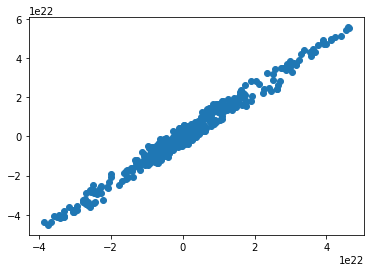

In [14]:
plt.scatter(x_data, y_data)

In [17]:
results2.conf_int()[-1]

array([1.18383879, 1.2156042 ])

In [19]:
results2.params[-1]

1.199721490916434

In [27]:
test = numpy.array([1,2,3,4,5,6,7,8,9,10,11])

To create the decadal mean...

In [54]:
width = 4
nchunks = math.ceil(len(test) / width)
test_split = [x for x in numpy.array_split(test, nchunks) if x.size == width]
test_split

[array([1, 2, 3, 4]), array([5, 6, 7, 8])]

In [55]:
numpy.array(list(map(numpy.mean, test_split)))

array([2.5, 6.5])